# **Question 1**

## **1a) Importing Dataset and Librairies.**

In [4]:
# Implement line wrapping
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <Style>
    pre{
      white-space: pre-wrapped;
    }
  </Style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [11]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Above is the code for importing the relevant libraries for data-preprocessing. The purpose of each is described as follows:


*   **Pandas**: For dataset storage. analysis and manipulation.
*   **Numpy**: For the execution of scientific mathematical operations.
*   **Matplotlib**: For data visualization as charts.



In [14]:
# Load dataset
DATA_DIR_1 = "/content/flood_detection.csv"
flood_df = pd.read_csv(DATA_DIR_1, header = 0)
flood_copy_df = pd.read_csv(DATA_DIR_1, header = 0)

The flood_detection dataset was loaded and stored as a data frame in the variable "flood_df" using the read_csv() function from the pandas library.

## **1b) Finding the number of rows and columns.**

In [ ]:
# Outputting number of rows and columns
print("Number of rows:", flood_df.shape[0])
print("Number of columns", flood_df.shape[1])

(1452, 10)
Number of rows: 1452
Number of columns 10


As shown in the output above, the number of rows (**1452**) and columns (**10**) were determined using the **shape** attribute of the data frame. The shape attribute returns a list with the number of rows in the 1st index and the number of columns in the 2nd index.

## **1c) Find the listing of all columns.**

In [ ]:
# Find listing of all columns
print("Flood_Detection.csv Column Listing: \n")
for c in flood_df.columns:
  print(c)

Flood_Detection.csv Column Listing: 

obsID
CountyID
impactLevel
FloodSource
countyName
EARegion
AltCountyName
ObservationDate
ImpactLevelDescription
FloodSourceDescription


As shown in the above code and output, flood_detection.csv's columns' names have been access using flood_df's **columns** attribute.

# **1d) Find the basic information of each column.**

In [ ]:
# get basic statistics of numerical columns
flood_df.describe()

,obsID,CountyID,impactLevel
count,1452.000000,1452.000000,1369.000000
mean,2571.321625,38.251377,2.822498
std,600.723760,29.546926,0.432478
min,1571.000000,1.000000,1.000000
25%,1784.000000,15.000000,3.000000
50%,2914.500000,30.000000,3.000000
75%,3022.250000,55.000000,3.000000
max,3128.000000,109.000000,3.000000


In [15]:
# Get count of categorical columns
num_columns = ["obsID", "CountyID", "impactLevel"]
for c in flood_df.columns:
  if (c not in num_columns):
    print(c, "count", flood_df[c].count())

FloodSource count 1369
countyName count 1452
EARegion count 1452
AltCountyName count 1452
ObservationDate count 1452
ImpactLevelDescription count 1369
FloodSourceDescription count 1369


As shown above, using the pandas' function describe() we can output count, mean, standard deviation, min value, max value and quartiles of the numerical columns. Additionally since the describe() function does not consider categorical columns by default, their count values need to be individually accessed using the pandas count() function.

In [ ]:
# get mode of all columns
for c in flood_df.columns:
  print(c, "mode:", flood_df[c].mode()[0])

obsID mode: 2967
CountyID mode: 30
impactLevel mode: 3.0
FloodSource mode: S
countyName mode: North Yorkshire
EARegion mode: Midlands - Solihull
AltCountyName mode: N Yorkshire
ObservationDate mode: 27/08/2016
ImpactLevelDescription mode: Minor
FloodSourceDescription mode: Surface water


However since such statistics does not apply to categorical columns (except count), we can find their mode using the pandas function mode() and since this function returns a list, we only get the first index value, which contains the actual mode of the column.

# **1e) Determining the data type of each column.**

In [ ]:
# Get data type of each column
flood_df.dtypes

obsID                       int64
CountyID                    int64
impactLevel               float64
FloodSource                object
countyName                 object
EARegion                   object
AltCountyName              object
ObservationDate            object
ImpactLevelDescription     object
FloodSourceDescription     object
dtype: object

From the output above, we can determine the data type of each column using the data frame's "**dtypes**" attribute.

## **1f) Finding the total number of counties studied in this dataset**

In [ ]:
# Get number of unique values in CountyID column
print("Number of counties studied: %d" %flood_df["CountyID"].nunique())

Number of counties studied: 107


By counting the number of unique values from the CountyID column, which is used to uniquely identify each county, we can determine the number of counties studied in this dataset, which in this case is **107 counties**.

# **Question 2**

## **2a) Finding the number of missing values in each column.**

In [16]:
# Finding number of missing values in each column
print("Number of missing values in each column: \n")
print(flood_df.isna().sum())

Number of missing values in each column: 

obsID                      0
CountyID                   0
impactLevel               83
FloodSource               83
countyName                 0
EARegion                   0
AltCountyName              0
ObservationDate            0
ImpactLevelDescription    83
FloodSourceDescription    83
dtype: int64


Using the **isna()** function to identify an empty cell in each column and the **sum()** function to aggregate the number of those empty cells, we can determine the number of missing values in each column, as shown in theh output above.

## **2b) Perform Data Cleansing and data set pre-processing**

### **Data Imputation**

In [25]:
# imputing values
mv_columns = ["impactLevel", "FloodSource", "ImpactLevelDescription", 
              "FloodSourceDescription"]
for c in mv_columns:
  mode = flood_df[c].mode()[0]
  print(c, "mode:", mode)
  print("Imputing rows containing missing values with", mode)
  flood_df[c].fillna(mode, inplace= True)
  flood_copy_df[c].fillna(mode, inplace= True)
  print("")
print("Missing values per column after data imputation:")
print(flood_df.isna().sum())


impactLevel mode: 3.0
Imputing rows containing missing values with 3.0

FloodSource mode: S
Imputing rows containing missing values with S

ImpactLevelDescription mode: Minor
Imputing rows containing missing values with Minor

FloodSourceDescription mode: Surface water
Imputing rows containing missing values with Surface water

Missing values per column after data imputation:
obsID                     0
CountyID                  0
impactLevel               0
FloodSource               0
countyName                0
EARegion                  0
AltCountyName             0
ObservationDate           0
ImpactLevelDescription    0
FloodSourceDescription    0
dtype: int64


To handle handle the missing values, a value can be inputed in the empty cells so as not to affect the dataset's sample size. Since all concerned columns in this case are categorical columns, onnly the mode can be used for data imputation, which can be performed using the fillna() method as shown in the code above. 

As seen in the output above, there are no missing values left after the data imputation.

### **Encoding**

In [23]:
# import labelEncoder class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df = flood_copy_df
for c in encoded_df.columns:
  if (c not in num_columns):
    encoded_df[c] = le.fit_transform(encoded_df[c])
    print(encoded_df[c].head(5))
    print("")

0    2
1    3
2    2
3    3
4    2
Name: FloodSource, dtype: int64

0    18
1    32
2    59
3    91
4    27
Name: countyName, dtype: int64

0    3
1    3
2    2
3    0
4    5
Name: EARegion, dtype: int64

0    18
1    32
2    55
3    90
4    27
Name: AltCountyName, dtype: int64

0     0
1     0
2    33
3    41
4    41
Name: ObservationDate, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: ImpactLevelDescription, dtype: int64

0    2
1    3
2    2
3    3
4    2
Name: FloodSourceDescription, dtype: int64



In order for the machine learning algorithm to be able to process this dataset, all categorical data needs to be converted to numerical data using the LabelEncoder and its fit_transform() function.

As shown in the head() output above, all categorical columns has had their data endoded.

### **Feature Scaling**

In [19]:
flood_df.head()

,obsID,CountyID,impactLevel,FloodSource,countyName,EARegion,AltCountyName,ObservationDate,ImpactLevelDescription,FloodSourceDescription
0,1571,13,3.0,R,Cumbria,Northwest - Warrington,Cumbria,01/01/2015,Minor,River
1,1571,7,3.0,S,Greater Manchester,Northwest - Warrington,Gtr Manchester,01/01/2015,Minor,Surface water
2,1572,30,3.0,R,North Yorkshire,Northeast - Leeds,N Yorkshire,07/01/2015,Minor,River
3,1573,75,3.0,S,Thurrock,Anglian - Peterborough,Thurrock,08/01/2015,Minor,Surface water
4,1573,18,3.0,R,East Sussex,Southeast South - Worthing,E Sussex,08/01/2015,Minor,River


In [26]:
encoded_df.isna().sum()

obsID                     0
CountyID                  0
impactLevel               0
FloodSource               0
countyName                0
EARegion                  0
AltCountyName             0
ObservationDate           0
ImpactLevelDescription    0
FloodSourceDescription    0
dtype: int64

In [27]:
# Scaling the dataset using Standard Scaler
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(encoded_df)
scaled_df = pd.DataFrame(std_scale, columns = encoded_df.columns)

In [28]:
print(scaled_df.head())

      obsID  CountyID  impactLevel  FloodSource  countyName  EARegion  \
0 -1.665768 -0.854914     0.396765    -0.773682   -1.101484 -0.110282   
1 -1.665768 -1.058051     0.396765     0.535626   -0.645828 -0.110282   
2 -1.664103 -0.279360     0.396765    -0.773682    0.232939 -0.545414   
3 -1.662437  1.244166     0.396765     0.535626    1.274440 -1.415679   
4 -1.662437 -0.685633     0.396765    -0.773682   -0.808562  0.759983   

   AltCountyName  ObservationDate  ImpactLevelDescription  \
0      -1.100042        -1.649237               -0.486907   
1      -0.643337        -1.649237               -0.486907   
2       0.106964        -1.091782               -0.486907   
3       1.248727        -0.956641               -0.486907   
4      -0.806445        -0.956641               -0.486907   

   FloodSourceDescription  
0               -0.773682  
1                0.535626  
2               -0.773682  
3                0.535626  
4               -0.773682  


Feature scaling is executed using the standard scaler method. This method is performed using the StandardScaler class from the sci-kit learn preprocessing library and its respective fit_transform() function.

## **2c) Checking the number of levels in ImpactLevel column.**

In [29]:
# Checking number of levels in immpactLevel column
print("Number of levels in ImpactLevel column:", flood_df["impactLevel"].nunique())

Number of levels in ImpactLevel column: 3


Using the pandas nuniques() function, the number of unique values in the impactLevel column can be counted, hence a total number of **3 levels**.

## **2d) Finding the mode from ImpactLevelDescription column.**

In [ ]:
# Getting ImpactLevelDescription mode
print("ImpactLevelDescription mode:", flood_df["ImpactLevelDescription"].mode()[0])

ImpactLevelDescription mode: Minor


By using the pandas mode() function, the mode of the ImpactLevelDescription column can be determined to be "**Minor**".

## **2e) Finding the mode from the FloodSourceDescription column**

In [ ]:
# Getting FloodSourceDescription mode
print("FloodSourceDescription mode:", flood_df["FloodSourceDescription"].mode()[0])

FloodSourceDescription mode: Surface water


By using the pandas mode() function, the mode of the FloodSourceDescription column can be determined to be "**Surface Water**".

## **2f) Impute missing values with ImpactLevelDescription mode value.**

In [ ]:
# Impute mmissing values in ImpactLevelDescription column with its mode
flood_df["ImpactLevelDescription"].fillna(flood_df["ImpactLevelDescription"].mode()[0], inplace = True)
print("Number of missing values after imputation: ", flood_df["ImpactLevelDescription"].isna().sum())

Number of missing values after imputation:  0


As shown in the code above, the mode data imputation is carried out using the pandas fillna() function and we can see from the isna().sum() output that all missing values have been dealt with.

## **2g) Impute missing values with FloodSourceDescription mode value.**

In [ ]:
# Impute mmissing values in FloodSourceDescription column with its mode
flood_df["FloodSourceDescription"].fillna(flood_df["FloodSourceDescription"].mode()[0], inplace = True)
print("Number of missing values after imputation: ", flood_df["FloodSourceDescription"].isna().sum())

Number of missing values after imputation:  0


As shown in the code above, the mode data imputation is carried out using the pandas fillna() function and we can see from the isna().sum() output that all missing values have been dealt with.

## **2h) Give your opinion whether this kind of repetition is appropriate in a dataset? Justify your answer.**

Having this kind of repetition allows for easier multiclass classification coding since the ImpactLevelDescription and FloodSourceDescription can be directly one-hot encoded in order to format them into the proper shape were they to be used as dependent variables. Additonally, having the presence of impactLevel column allows for this data to be directly used as feature without the need of encoding but the same cannot be said for FloodSource as it still contains categorical data. Hence, this kind of reprtition is appropriate for this dataset as it simplifies the data pre-processing for multi-class classification.

## **2i) Printing the frequent distribution of countyName column.**

Frequency distribution of 
North Yorkshire            72
Cumbria                    53
Devon                      53
Worcestershire             52
Gloucestershire            50
                           ..
North East Lincolnshire     1
Torbay                      1
Stockton-on-Tees            1
North Lincolnshire          1
Blackpool                   1
Name: countyName, Length: 107, dtype: int64


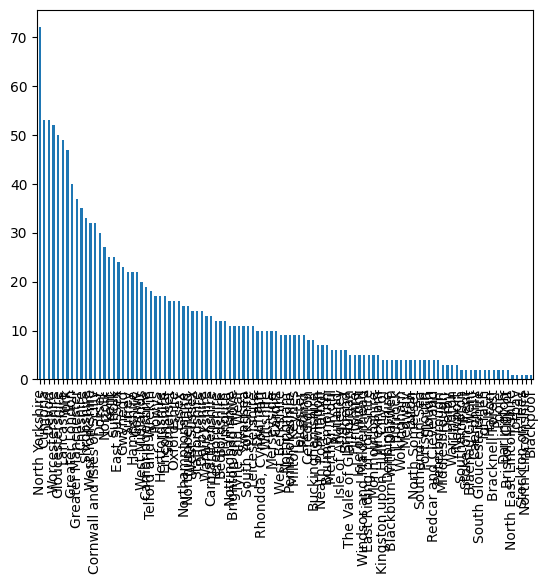

In [ ]:
# Print the frequent distribution of the countyName column.
print("Frequency distribution of ")
print(flood_df["countyName"].value_counts())
# visualize frequency distribution of countyName column
flood_df["countyName"].value_counts().plot(kind='bar') 
plt.xticks(rotation = 90)
plt.show()

The frequency distribution of the countyName Column was displayed as text using the pandas unique() function and visualized as a barplot using the matplotlib plot() function,

# **Question 3**

## **3a) Split dataset into train and test sets.**

In [30]:
from sklearn.utils import shuffle # Method to shuffle dataset
from sklearn.model_selection import train_test_split # Method to split dataset
# Shuffle dataset
shuffled_df = shuffle(scaled_df, random_state = 42)
shuffled_df.head()
# Set the ImpactLevelDescription as the dependent variable
DV = "ImpactLevelDescription"
x = shuffled_df.drop(DV, axis = 1)
y = flood_df[DV]
# One-hot encode the dependent variable
shuffled_y = shuffle(y, random_state = 42)
encoded_y = pd.get_dummies(shuffled_y, drop_first=False)
print ('There are {} columns in df_dummies'.format (encoded_y.shape[1]))
print(encoded_y.head())

There are 3 columns in df_dummies
      Minor  Severe  Significant
1036      1       0            0
1124      0       0            1
997       1       0            0
1316      1       0            0
529       1       0            0


The scaled dataset is shuffled to avoid order-based biasness using the **shuffle()** function and and the **ImpactLevelDescription column** is set as the **dependent variable** as it is the impact level of the flood which needs to be predicted. The dependent variable is then one-hot encoded using the **get_dummies()** function to format it suitably for a multiclass classification.

In [31]:
# Split dataset in a 80:20 train:test proportion
x_train, x_test, y_train, y_test = train_test_split (x, encoded_y, test_size=0.20, random_state=42)
print("Training set shape:")
print(x_train.shape, y_train.shape, "\n")
print("Testing set shape:")
print(x_test.shape, y_test.shape)

Training set shape:
(1161, 9) (1161, 3) 

Testing set shape:
(291, 9) (291, 3)


As shown above, the dataset is split using the train_test_split() method in a 80:20 train to test proportion following the Pareto theorem. 80% of the data is allocated to training in order to provide the most data possible to the machine learning algorithm to learn the patterns in the data and the remaining 20% is used to validate the data.

In [32]:
x_train.head()

,obsID,CountyID,impactLevel,FloodSource,countyName,EARegion,AltCountyName,ObservationDate,FloodSourceDescription
1153,0.817093,-1.091907,0.396765,0.535626,-0.678375,0.324851,-0.675958,-1.294493,0.535626
1278,0.848733,-0.211647,0.396765,0.535626,0.395674,0.324851,0.400560,1.323857,0.535626
177,-1.454283,-1.261187,0.396765,0.535626,-0.125077,-0.110282,-0.121388,0.783294,0.535626
805,0.630587,1.921289,0.396765,-3.392296,-1.231672,1.630248,-1.230529,-0.922856,-3.392296
1277,0.848733,-0.245504,0.396765,0.535626,0.363127,-0.980546,0.367939,1.323857,0.535626


## **3b) Build the Neural Network model with Keras**

In [34]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
# Define the model architecture
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=9))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))
y_train.shape



(1161, 3)

The neural network is first built using by instantiating the **Sequential()** object from the keras.models library. The input layer is then added with **9 neurons**, one for each input feature and the activation function set for the input and hidden layer is **ReLu**. The number of neuron set for the output layer is **3**, one for each possible label and the activation function set is **softmax** due to the multiclass nature of the dependent variable.

In [35]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=100)
accuracy = model.evaluate(x_test, y_test)[1]
print("Accuracy: %.2f" %(accuracy*100), "%")

Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 1.5398 - accuracy: 0.1964
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.3084
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3039 - accuracy: 0.4264
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2137 - accuracy: 0.5289
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1364 - accuracy: 0.6012
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0698 - accuracy: 0.6718
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.7235
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9564 - accuracy: 0.7373
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9065 - accuracy: 0.7752
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.8226
Epoch 11/50
12/12 [

As shown above, the loss parameter is set to **"categorical_crossentropy"** due to the multiclass nature of the dependent variable and the **accuracy of the training is 98.63%**, as shown in the output above.

## **3c) Evaluate the model using Accuracy, Precision, Recall, ROC and AUC.**

In [74]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_curve, auc
# Get predictions
train_set_preds =  model.predict(x_train)
test_set_preds =  model.predict(x_test)
train_set_preds =  np.round(train_set_preds, decimals=2)
test_set_preds =  np.round(test_set_preds, decimals=2)

10/10 [==============================] - 0s 2ms/step


The training and test predicctions are produced using the predict() function and those predictions are then rounded to 2 decimal points using the numpy function round().

In [75]:
print("Training predictions: \n")
print(train_set_preds)

Training predictions: 

[[0.99 0.01 0.01]
 [0.98 0.01 0.01]
 [0.97 0.02 0.02]
 ...
 [0.99 0.01 0.  ]
 [0.99 0.   0.  ]
 [0.99 0.   0.  ]]


In [76]:
print("Testing predictions: \n")
print(test_set_preds)

Testing predictions: 

[[0.99 0.   0.  ]
 [0.   0.05 0.94]
 [0.1  0.17 0.74]
 [0.99 0.   0.01]
 [0.98 0.01 0.01]
 [0.99 0.   0.  ]
 [0.47 0.06 0.47]
 [1.   0.   0.  ]
 [0.99 0.   0.  ]
 [0.14 0.19 0.67]
 [0.99 0.   0.  ]
 [0.99 0.   0.  ]
 [0.99 0.01 0.01]
 [1.   0.   0.  ]
 [0.99 0.   0.01]
 [0.15 0.22 0.64]
 [0.99 0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.01]
 [0.99 0.01 0.  ]
 [0.99 0.01 0.  ]
 [0.99 0.01 0.01]
 [1.   0.   0.  ]
 [0.99 0.   0.  ]
 [0.98 0.01 0.01]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [0.98 0.01 0.01]
 [0.99 0.01 0.  ]
 [0.98 0.01 0.01]
 [0.99 0.01 0.01]
 [0.99 0.01 0.01]
 [0.97 0.02 0.01]
 [0.97 0.01 0.02]
 [0.98 0.   0.01]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.98 0.01 0.01]
 [0.98 0.01 0.01]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [0.99 0.   0.  ]
 [1.   0.   0.  ]
 [0.98 0.01 0.01]
 [0.98 0.01 0.01]
 [0.98 0.01 0.01]
 [0.97 0.01 0.02]
 [0.98 0.01 0.01]
 [0.99 0.   0.  ]
 [0.99 0.   0.  ]
 [0.1  0.11 0.79]
 [0.99 0.   0.  ]
 [0.98 0.01 0.01]
 [0.99 0.01 0.01]
 [1. 

In [78]:
#format true test values
y_test_arr = np.array(y_test)
formatted_y_test = np.argmax(y_test_arr, axis=1)
print("Formatted true test values: \n")
print(formatted_y_test)

Formatted true test values: 

[0 1 2 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 1 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0
 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0]


In [79]:
#format true training values
y_train_arr = np.array(y_train)
formatted_y_train = np.argmax(y_train_arr, axis=1)
print("Formatted true training values: \n")
print(formatted_y_train)

Formatted true training values: 

[0 0 0 ... 0 0 0]


In [80]:
#format test pred values
formatted_test_set_preds = np.argmax(test_set_preds, axis=1)
print("Formatted testing prediction values: \n")
print(formatted_test_set_preds)

Formatted testing prediction values: 

[0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0
 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0]


In [81]:
#format training pred values
formatted_train_set_preds = np.argmax(train_set_preds, axis=1)
print("Formatted training prediction values: \n")
print(formatted_train_set_preds)

Formatted training prediction values: 

[0 0 0 ... 0 0 0]


The true training and testing values are formatted into numpy arrays using the numpy function **array()** and both the true and predicted training and testing values are further formated to a 1D array using the numpy function **argmax()**, where each prediction takes form of 0,1 or 2 such that each digit corresponds to minor, severe or significant respectively, to calculate the performance metrics.

In [88]:
# Calculate Accuracy, precision and Recall metrics
print('Accuracy for test set: %0.4f' % accuracy_score(formatted_y_test, formatted_test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(formatted_y_train, formatted_train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(formatted_y_test, formatted_test_set_preds, average = "weighted", zero_division=0))
print('Precision for train set: %0.4f' % precision_score(formatted_y_test, formatted_test_set_preds, average = "weighted", zero_division=0))

print('\n')

print('Recall for test set: %0.4f' % recall_score(formatted_y_test, formatted_test_set_preds, average = "weighted"))
print('Recall for train set: %0.4f' % recall_score(formatted_y_test, formatted_test_set_preds, average = "weighted"))

Accuracy for test set: 0.9828
Accuracy for train set: 0.9793


Precision for test set: 0.9701
Precision for train set: 0.9701


Recall for test set: 0.9828
Recall for train set: 0.9828


As shown above, the accurary, precision and recall metrics were calculated for both the training and testing sets by using the accuracy_score(), precision_score() and recall_score() functions respectively. Additionally, the average parameter for the precision and recall functions was set to "weighted" so as to account for class imbalance.

In [101]:
# Calculate AUC
# Get size of labels array
n_classes = len(np.unique(formatted_y_train))
test_fpr = dict()
test_tpr = dict()
test_thresholds = dict()
train_fpr = dict()
train_tpr = dict()
train_thresholds = dict()
# Calculate the training FPR, TPR, and thresholds for each label
for i in range(n_classes):
    y_true_train = np.array(formatted_y_train== i, dtype=int)
    train_fpr[i], train_tpr[i], train_thresholds[i] = roc_curve(y_true_train, formatted_train_set_preds)
# Calculate the training weighted-average ROC curve and AUC
train_fpr["weighted"], train_tpr["weighted"], _ = roc_curve(y_true_train.ravel(), 
                                                            formatted_train_set_preds.ravel())
auc_score_train = auc(train_fpr["weighted"], train_tpr["weighted"])

# Calculate the testing FPR, TPR, and thresholds for each class
for i in range(n_classes):
    y_true_test = np.array(formatted_y_test== i, dtype=int)
    test_fpr[i], test_tpr[i], test_thresholds[i] = roc_curve(y_true_test, formatted_test_set_preds)
# Calculate the testing weighted-average ROC curve and AUC
test_fpr["weighted"], test_tpr["weighted"], _ = roc_curve(y_true_test.ravel(), 
                                                          formatted_test_set_preds.ravel())
auc_score_test = auc(test_fpr["weighted"], test_tpr["weighted"])

print('AUC for train set: %0.4f' % auc_score_train)
print('AUC for test set: %0.4f' % auc_score_test)

AUC for train set: 0.9882
AUC for test set: 0.9792


Due to the presence of multiple labels, the training and testing FPR, TPR, and threshold need to be calculated for each said label using the roc_curve() function.
The AUC score of the training and testing set is then calculated using the auc() function.

## **3d) Visualize the ROC curve**

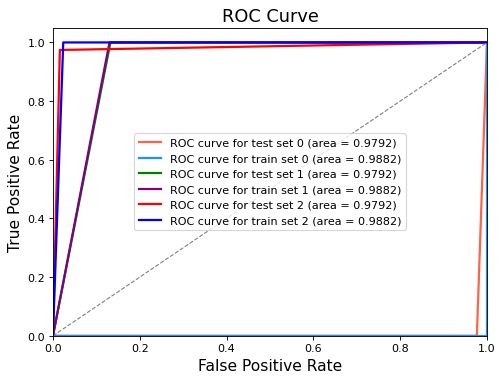

In [109]:
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
test_colors = ["tomato", "green", "red"]
train_colors = ["dodgerblue", "purple", "blue"]
for i in range(n_classes):
  plt.plot(test_fpr[i],
          test_tpr[i],
          color=test_colors[i],
          lw = 2,
          label='ROC curve for test set %d (area = %0.4f)' %(i, auc_score_test))
  plt.plot(train_fpr[i],
          train_tpr[i],
          lw = 2,
          color=train_colors[i],
          label='ROC curve for train set %d (area = %0.4f)' %(i, auc_score_train))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="center")

plt.show()

Again due to the presence of mulitple labels, the ROC curve for each of the labels need to plotted indiviually and are then displayed onn the same axes using the matplotlib function **plot()**.

## **3e) onclusion about using neural network for flood detection.**

With an accuracy, precision, recall, AUC and ROC value of all above 95% for both training and testing sets, the neural network model is indeed a very good model for flood prediction.

# **Question 4**

# **4a) Define and build the logistic regression model.**

In [110]:
from sklearn.linear_model import LogisticRegression
# Defining the logistic regression model
r_model = LogisticRegression(multi_class='ovr')

The regression model is instantiated from the LogisticRegression() class of the scikit-learn library and its multi_class parameter is set to **"ovr"** to allow for **multiclass classification**.

## **4b) Train the regression model.**

In [115]:
# Training the logistoc regression model
r_model.fit(x_train, formatted_y_train)

LogisticRegression(multi_class='ovr')

The regression model is trained by fitting the feature training set (x_train) and the formatted outcome training set (formatted_y_train) to the model using the LogisticRegression's fit() function.

## **4c) Regression model prediction.**

In [118]:
# Computing predictions using the logistic regression model
r_train_preds = model.predict(x_train)
r_test_preds = model.predict(x_test)

10/10 [==============================] - 0s 3ms/step


The predictions of the regression model are computed using the predict() method and the training and testing predictions are each stored in r_train_preds and r_test_preds respectively.

In [121]:
print("Logistic regression training predictions: \n")
r_train_set_preds = np.argmax(r_train_preds, axis=1)
print(r_train_set_preds)

Logistic regression training predictions: 

[0 0 0 ... 0 0 0]


In [122]:
print("Logistic regression testing predictions: \n")
r_test_set_preds = np.argmax(r_test_preds, axis=1)
print(r_test_set_preds)

Logistic regression testing predictions: 

[0 2 2 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0
 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0]


Both predictions set are then formatted to a 1D array using the numpy funtion argmax() with the predictions taking the form of 0,1 or 2 where each digit corresponds to minor, severe or significant respectively.

In [127]:
print('Accuracy for test set: %0.4f' % accuracy_score(formatted_y_test, r_test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(formatted_y_train, r_train_set_preds))


Accuracy for test set: 0.9863
Accuracy for train set: 0.9793


As shown above, the accuracy of the training and testing predictions are computed using the accuracy_score() function and it can be observed that both accuracy values are above 97%.